0.5171091139906031
0.5
0.029012942659282972


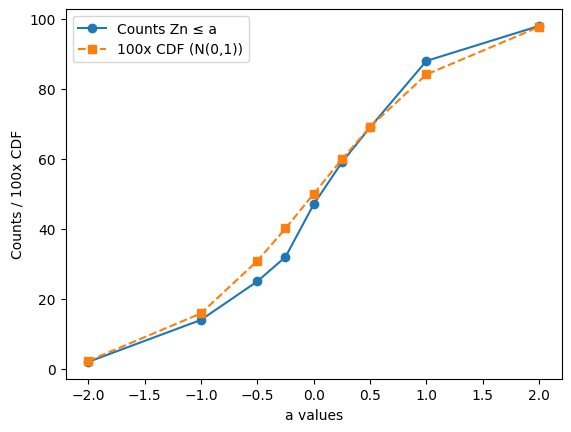

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

X_bar_n = np.mean(np.random.uniform(0, 1, 100))
mu_X = 0.5
var_X = 1/12
var_X_bar = np.sqrt(var_X / 99)
print(X_bar_n)
print(mu_X)
print(var_X_bar)

a_vals = [-2, -1, -0.5, -0.25, 0, 0.25, 0.5, 1, 2]
z_vals = []
for _ in range(100):
    sample_mean = np.mean(np.random.uniform(0, 1, 100))
    z_vals.append((sample_mean - mu_X) / np.sqrt(var_X / (99)))

counts = [int((np.array(z_vals) <= a).sum()) for a in a_vals]
cdf = 100 * norm.cdf(a_vals)

plt.plot(a_vals, counts, "o-", label="Counts Zn ≤ a")
plt.plot(a_vals, cdf, "s--", label="100x CDF (N(0,1))")
plt.legend()
plt.xlabel("a values")
plt.ylabel("Counts / 100x CDF")
plt.show()

Theoretical values:
E[X̄_n] = 0.5000
Var(X̄_n) = 0.000842
Std(X̄_n) = 0.029013


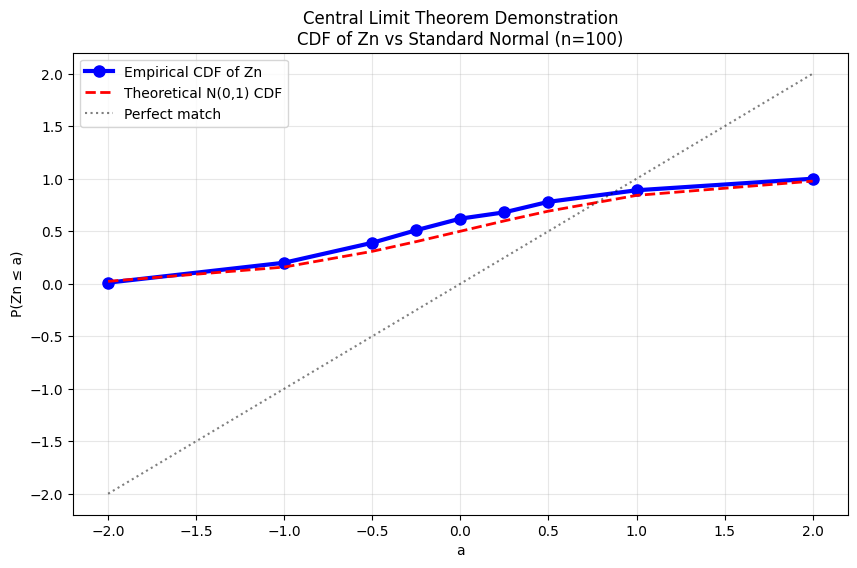

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Parameters
n = 100  # sample size
num_trials = 100  # number of experiments
a_values = [-2, -1, -0.5, -0.25, 0, 0.25, 0.5, 1, 2]

# For uniform [0,1] distribution
mu = 0.5  # true mean
sigma_sq = 1/12  # true variance = (1-0)^2/12 = 1/12

# Theoretical distribution of sample mean
mu_Xn = mu  # E[X̄_n] = μ
var_Xn = sigma_sq / (n - 1)  # Var(X̄_n) = σ²/n
std_Xn = np.sqrt(var_Xn)

print(f"Theoretical values:")
print(f"E[X̄_n] = {mu_Xn:.4f}")
print(f"Var(X̄_n) = {var_Xn:.6f}")
print(f"Std(X̄_n) = {std_Xn:.6f}")

# Perform 100 trials
np.random.seed(42)  # for reproducibility
Zn_values = []

for trial in range(num_trials):
    # Generate n uniform random variables
    samples = np.random.uniform(0, 1, n)
    
    # Calculate sample mean
    Xn_bar = np.mean(samples)
    
    # Calculate Zn
    Zn = (Xn_bar - mu_Xn) / std_Xn
    Zn_values.append(Zn)

Zn_values = np.array(Zn_values)

# Calculate empirical CDF at each a value
empirical_cdf = []
theoretical_cdf = []

for a in a_values:
    # Empirical CDF: proportion of Zn ≤ a
    empirical_prob = np.mean(Zn_values <= a)
    empirical_cdf.append(empirical_prob)
    
    # Theoretical CDF from N(0,1)
    theoretical_prob = stats.norm.cdf(a)
    theoretical_cdf.append(theoretical_prob)

# Simplified demonstration of the Central Limit Theorem in action
plt.figure(figsize=(10, 6))

# Plot empirical vs theoretical CDF
plt.plot(a_values, empirical_cdf, 'bo-', linewidth=3, markersize=8, label='Empirical CDF of Zn')
plt.plot(a_values, theoretical_cdf, 'r--', linewidth=2, label='Theoretical N(0,1) CDF')

# Add perfect match line for reference
plt.plot([-2, 2], [-2, 2], 'k:', alpha=0.5, label='Perfect match')

plt.xlabel('a')
plt.ylabel('P(Zn ≤ a)')
plt.title('Central Limit Theorem Demonstration\nCDF of Zn vs Standard Normal (n=100)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()